In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data
messages = [line.rstrip() for line in open('SMS_Data')]
print(len(messages))

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
#\t shows us that the values are tab seperated

In [6]:
#storing in a DataFrame
df = pd.read_csv('SMS_Data',sep='\t',names=['label','message'])

In [7]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
#Exploratory Data Analysis

In [9]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
#storing the length of the messages in a new column
df['message_length'] = df['message'].apply(lambda x: len(x))

In [12]:
df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df['message_length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

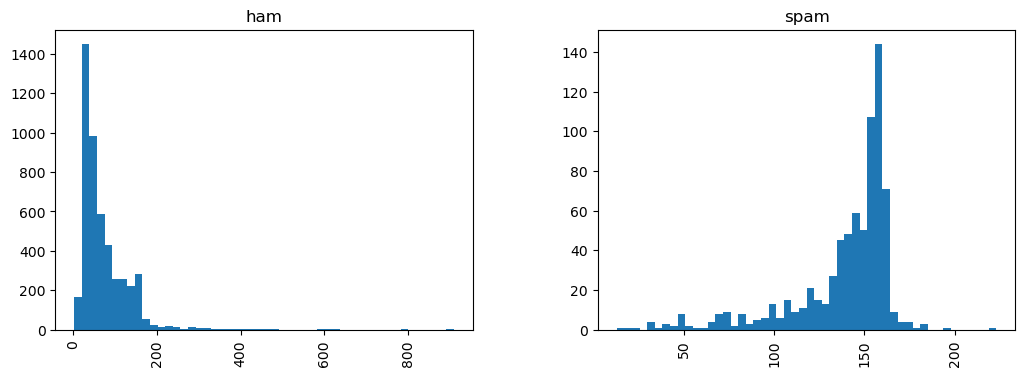

In [14]:
df.hist(column='message_length', by='label', bins=50,figsize=(12,4))

In [15]:
#spam messages tend to have more characters

In [16]:
#pre-text processing
"""
1, removing punctuations
2, removing stopwords
"""

'\n1, removing punctuations\n2, removing stopwords\n'

In [17]:
import string
from nltk.corpus import stopwords

In [18]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [19]:
#example
text_process(df['message'].iloc[1])

['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']

In [20]:
#performing Vectorisation, TF-IDF and Classification using pipeline

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [23]:
#using Naive-Bayes Classifier
pipe1 = Pipeline([
    ('bagofwords',CountVectorizer(analyzer = text_process)),# strings to token integer counts
    ('tfidf',TfidfTransformer()),# integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB())
])

In [24]:
#using Random-Forests Classifier
pipe2 = Pipeline([
    ('bagofwords',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [25]:
#splitting data into test and training data

In [26]:
X = df['message']
y = df['label']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('bagofwords',
                 CountVectorizer(analyzer=<function text_process at 0x000001FBBAB8DD00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [30]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('bagofwords',
                 CountVectorizer(analyzer=<function text_process at 0x000001FBBAB8DD00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [31]:
#checking performance

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
pred_nb = pipe1.predict(X_test)

In [34]:
pred_rf = pipe2.predict(X_test)

In [35]:
print("Using Naive Bayes Classifier\n\n",classification_report(y_test,pred_nb),"\n",confusion_matrix(y_test,pred_nb))

Using Naive Bayes Classifier

               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       968
        spam       1.00      0.71      0.83       147

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115
 
 [[968   0]
 [ 42 105]]


In [36]:
print("Using Random Forest Classifier\n\n",classification_report(y_test,pred_rf),"\n",confusion_matrix(y_test,pred_rf))

Using Random Forest Classifier

               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       968
        spam       1.00      0.78      0.87       147

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115
 
 [[968   0]
 [ 33 114]]
